# Basics of Plotting in Python

In [1]:
#Import pandas and matplotlib
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#Magic command to allow plots in Jupyter
%matplotlib inline

## Load the data as a dataframe

In [3]:
#Read the data into a data frame
df = pd.read_csv('./data/State_Data_Formatted_All.csv')
df.dtypes

State              object
Source             object
Type               object
Category           object
Withdrawal_MGD    float64
Population          int64
dtype: object

## Explore the data

* View the top few rows with `head()`. Alternatively, try `sample(5)` to view a random sample or `tail()` to view the last lines of data. 

In [4]:
#View the first 5 rows
df.head()

,State,Source,Type,Category,Withdrawal_MGD,Population
0,Alabama,Surface,Fresh,Total,9470.0,4780000
1,Alaska,Surface,Fresh,Total,391.0,710000
2,Arizona,Surface,Fresh,Total,3540.0,6390000
3,Arkansas,Surface,Fresh,Total,3540.0,2920000
4,California,Surface,Fresh,Total,18800.0,37300000


*It's important here to examine your data to see what values are categorical and which are continuous. Think about the various ways we can filter, group, and aggregate the data to provide meaningful summaries.*

* Extract a list of unique values for a given column with `unique()`

In [5]:
#List unique values in the Category field
df['Type'].unique()

array(['Fresh', 'Saline'], dtype=object)

* Use the `value_counts()` to tabulate the number of records within each unique value

In [6]:
#Count the number of records in each category with the value_counts() function
df['Category'].value_counts()

Total             424
Aquaculture       318
Thermoelectric    212
Livestock         212
Self Supplied     212
Mining            212
Industrial        212
Public Supply     212
Irrigation        212
Name: Category, dtype: int64

* Not very interesting as the data is regulalry sampled, but what if we filter the data to records with a Withdrawal above zero?

In [7]:
dfNonZero = df.query('Withdrawal_MGD > 0')
dfNonZero['Category'].value_counts()

Total             298
Aquaculture       154
Thermoelectric    124
Mining            122
Public Supply     104
Irrigation        104
Livestock          98
Self Supplied      61
Industrial         57
Name: Category, dtype: int64

* Tables are one thing, but plots can communicate more effectively. We can plot the data in the above table simply by adding `.plot()` at the end of the statement.

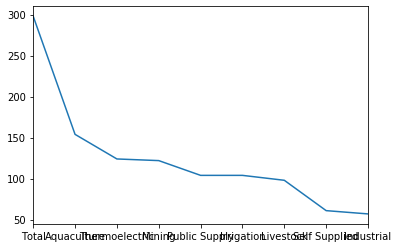

In [8]:
dfNonZero['Category'].value_counts().plot()

## Plotting!

#### Plot types
Ok, that first plot was somewhat easy, but not very pretty or all that informative. So let's now explore plotting! Let's dig deeper into how to modify the **kind** of plot (bar, pie, box, etc.) and how to tweak the **aesthetics** of the plot (color, title, labels, etc.).

* As seen above, the default plot type is line plot. We can change from the default using the `kind` parameter. First, we'll show that indeed the `line` is the default. (Also note that adding a `;` at the end of the statement suppresses the `<matplotlib.axes...` message. 

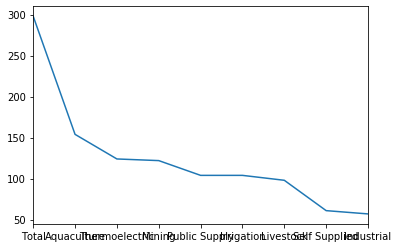

In [9]:
#Plot the number of records in each category; default is line
dfNonZero['Category'].value_counts().plot(kind='line');

* Change the `kind` of plot to `bar` to change it to a **bar** plot

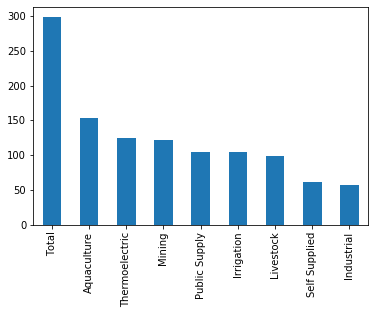

In [10]:
dfNonZero['Category'].value_counts().plot(kind='bar');

* Try other types: `barh`, `pie`, `box`

**NOTE** That different plots have specific uses:
 * <u>Line plots</u> are good for tracking change over time; the x-axis is continuous. 
 * <u>Bar and horizontal bar plots</u> can also track change over time, but here the x-axis (or y, if horizontal) is discrete, not continuous, so the time would be in blocks. These plots are also good for comparing values associated with various groups. 
 * <u>Pie charts</u> do not show change (no x-axis!) but are good at showing parts of a whole. 
 
There are many other types of plots and charts, of course, and each has a best case scenario. Check the literature for a more in-depth discussion on this. For example: see Stephanie Evergreen's [Chart Chooser utilities](http://stephanieevergreen.com/tag/chart-chooser/) for some ideas.


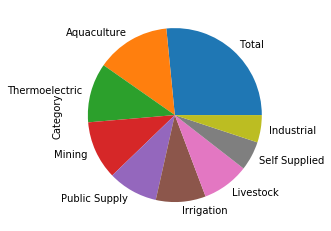

In [11]:
dfNonZero['Category'].value_counts().plot(kind='pie');

#### Color
* Change the color of the bars in the horizontal bar plot with the `color` option. You can use any named color shown here: https://matplotlib.org/examples/color/named_colors.html, or you can specify a color by it's hexcode (see https://htmlcolorcodes.com/) preceded by a `#`, e.g. `#ff5733`. Try changing the color below to `maroon`.

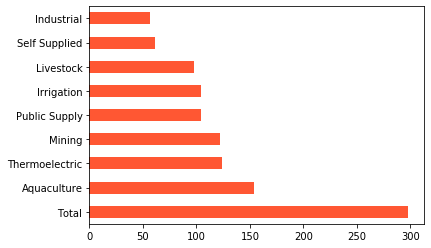

In [12]:
dfNonZero['Category'].value_counts().plot(kind='barh',color='#ff5733');

#### Size
* Change the size of the plot with `figsize=()`. Supply a tuple of width and height to change the size of your plot. Values are somewhat arbitrary, so play around. (Also note that I've changed the format of the command, putting parameters on separate lines to make it more readable...) 

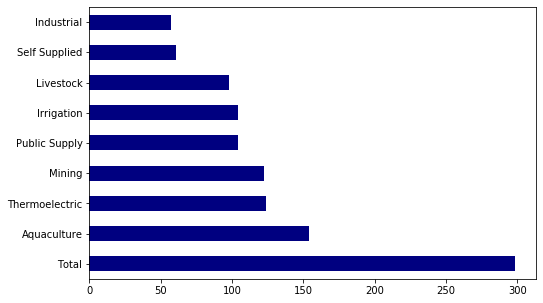

In [13]:
dfNonZero['Category'].value_counts().plot(kind='barh',
                                          color='navy',
                                          figsize=(8,5));

#### Colormaps

* *Colormaps* apply a suite of colors to values in a plot. Below is an example of applying a colormap to our pie chart. 

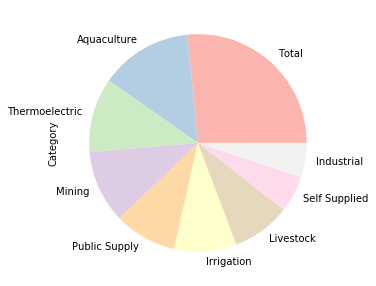

In [14]:
dfNonZero['Category'].value_counts().plot(kind='pie',
                                          colormap ='Pastel1',
                                          figsize=(5,5));

There are 3 classes of colormap, each with its own use:
 * **Sequential** colormaps have a change of lightness over one color. They used for continuous, ordered values.
 * **Diverging** colormaps are used when the information being plotted deviates around a middle value. Here there are often two different colors being used.
 * **Qualitative** colormaps are for unordered, categorical data.
 
See this link for a nice discussion:
https://matplotlib.org/users/colormaps.html

Matplotlib can do a *lot* more that what we've done here. However, it does get confusing, and you can see some examples in past notebooks. 

## More complex plots with Seaborn
Seaborn works in conjunction with matplotlib and was created to make matplotlib easier.  Seaborn, as with Matplotlib, has methods for bar plots, histograms and pie charts. Let's take a look at an example of one of the methods, countplot. 

In [15]:
#Importing seaborn
import seaborn as sns

#### Countplots in Seaborn
Countplot has very similar parameters to Matplotlib. The **data** parameter for countplot is where you provide the DataFrame or the source for the data. The **hue** is for the categorical variables. (Recall that a categorical variable is one that can only take a fixed number of values...) 

Lets creat a countplot first to show to show the count of records by `Type` (Fresh vs Saline) and then by both `Type` and `Source` (Surface vs Ground). 

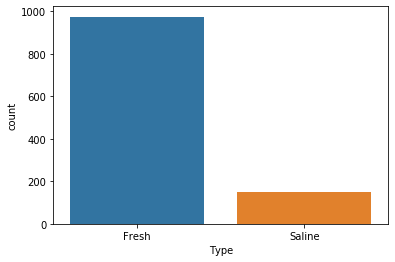

In [16]:
#Show the count of values, grouped by Type
sns.countplot(data=dfNonZero,x="Type");

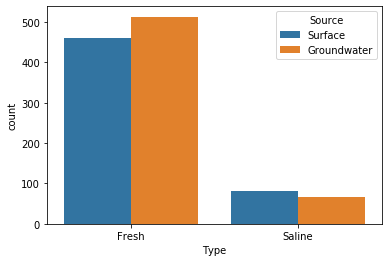

In [17]:
#Show the count of values, grouped by Type AND Source
sns.countplot(data=dfNonZero,x="Type",hue='Source');

## Spatial visualizations (i.e. maps) with folium
The `folium` package is actually an interface for "Leaflet" a [JavaScript API](http://leafletjs.com/) that allows us to plot markers on a map. In the exercise below, we'll first extract a set of NWIS sample points for a given state and then map the locations of these on a folium map.

Full documentation on the folium package is here: http://python-visualization.github.io/folium/docs-v0.5.0/

* First we'll pull a list of NWIS gage sites for NC from the NWIS server

In [18]:
#Get the list of site names for NC
theURL = ('https://waterdata.usgs.gov/nwis/inventory?' + \
          'state_cd=nc&' + \
          'group_key=NONE&' + \
          'format=sitefile_output&' + \
          'sitefile_output_format=rdb&' + \
          'column_name=site_no&' + \
          'column_name=station_nm&' + \
          'column_name=site_tp_cd&' + \
          'column_name=dec_lat_va&' + \
          'column_name=dec_long_va&' + \
          'column_name=drain_area_va&' + \
          'list_of_search_criteria=state_cd')
colnames=['site_no','station_nm','site_tp_cd','lat','lng','agent','datum','d_area']

#Pull the data from the URL
dfNWIS = pd.read_csv(theURL,skiprows=29,sep='\t',names=colnames,index_col='site_no')

#Drop rows with null values
dfNWIS.dropna(inplace=True)

#Display
dfNWIS.head()

,station_nm,site_tp_cd,lat,lng,agent,datum,d_area
site_no,,,,,,,
2043410,"NORTHWEST RIVER ABOVE MOUTH NEAR MOYOCK, NC",ST,36.512222,-76.086667,S,NAD83,196.00
2043415,"TULL CREEK AT SR 1222 NEAR CURRITUCK, NC",ST,36.496389,-76.084167,S,NAD83,52.00
2043750,CROSS CANAL DITCH NR HOLLY GROVE NC,ST-DCH,36.509875,-76.552450,U,NAD83,23.40
2043760,"FOLLY SWAMP NEAR SANBURY, NC",ST,36.488486,-76.574672,S,NAD83,3.42
2043828,"PASQUOTANK RIVER NR SOUTH MILLS, NC",ST,36.421821,-76.346885,U,NAD83,208.00


We have site number, site names, location coordinates and a field of drainage areas. Let's plot these on a map using the location coordinates. The steps in this process are as follows
* First, we'll compute the median lat and lng values to create a coordinate pair on which to center our map

In [19]:
#Determine the median lat/lng
medianLat = dfNWIS['lat'].median()
medianLng = dfNWIS['lng'].median()
print (medianLat,medianLng)

35.6862693 -79.1066796


* Next, we'll create our folium map object, setting some initial properties: the location, the zoom level, and the base map, or "tiles". (The default tiles are set to `OpenStreetMap`, but `Stamen Terrain`, `Stamen Toner`, `Mapbox Bright`, and `Mapbox Control Room`, and many others tiles are built in.

In [20]:
#Import the package
import folium
print(folium.__version__)

0.10.0


In [21]:
#Construct the map
m = folium.Map(location=[medianLat,medianLng],
               zoom_start = 7,
               tiles='OpenStreetMap'              
             )
#Display the map
m

Try playing with the parameters and see how the map appears. 

* Next, we'll add a single marker to our map. This is a two step process: first we create the marker, and then we add it to the map... We'll put our marker at the center of our map

In [22]:
#Create the marker, we'll use a circle Marker
myMarker = folium.CircleMarker(location=[medianLat,medianLng],
                               color='red',
                               fill=True,
                               fill_opacity=0.5,
                               radius=30
                              )

myMarker.add_to(m)
m

* Now we'll get a bit more complex. Here we'll loop through all of our records and add each as a marker to our map. We'll re-create our map which removes all previous markers.

In [23]:
#Recreate the map object to clear markers
m = folium.Map(location=[medianLat,medianLng],
               zoom_start = 7,
               tiles='OpenStreetMap'              
             )

#Loop through all features and add them to the map as markers
for row in dfNWIS.itertuples():
    #Get info for the record
    lat = row.lat
    lng = row.lng
    #Create the marker object, adding them to the map object
    folium.CircleMarker(location=[lat,lng],
                        color='blue',
                        fill=True,
                        fill_opacity=0.6,
                        radius=3).add_to(m)
#Show the map
m